<br><br>
<font size='6'><b>(Artificial) Neural Networks
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "100%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 65% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 35%>
        By Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

<table>
</table>

Table of Contents
<div id="toc"></div>

# 1. Artificial Neural Networks (ANN)

## 1.1. Recall supervised learning setup

- Input features $x^{(i)} \in \mathbb{R}^n$

- Ouput $y^{(i)}$

- Model parameters $\theta \in \mathbb{R}^k$

- Hypothesis function $h_{\theta}: \mathbb{R}^n \rightarrow y$

- Loss function $\ell: y \times y \rightarrow \mathbb{R}_+$

<br>
- Machine learning optimization problem

$$ \min_{\theta} \sum_{i=1}^{m}\ell\left( h_{\theta}\left(x^{(i)}\right),y^{(i)}\right)$$

$\quad \;$(possibly plus some additional regularization)

- But, many specialized domains required highly engineered special features

## 1.2. Neural networks

Neural networks are a simply a machine learning algorithm with a more complex hypothesis class, directly incorporating non-linearity (in the parameters)

<br>
__Example__: neural network with one hidden layer

$$h_{\theta}(x) = \Theta^{(2)} f\left( \Theta^{(1)}x\right)$$

where $\Theta^{(1)} \in \mathbb{R}^{k \times n}, \Theta^{(2)} \in \mathbb{R}^{1 \times k}$ and $f$ is some non-linear function applied elementwise to a vector

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/sigmoid_function.png" width = 250>
            $$ g(x) = \frac{1}{1+e^{-x}}$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/tanh_function.png" width = 250>
            <br>
            $$ g(x) = \tanh (x)$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/relu_function.png" width = 250>
            <br>
            $$ g(x) = \max (0, x)$$
        </td>
    </tr>
</table>

Architectures are often shown graphically

<img src="./image_files/nn_structure.png" width = 270>

- Middle layer $a$ is referred to as the hidden layer, there is nothing in the data that prescribes what values these should take, left up to the algorithm to decide

- __Viewed another way: neural networks are like classifiers where the features themselves are also learned__


- __Pros__
    - No need to manually engineer good features, just let the neural networks handle this part

- __Cons__

    - Minimizing loss on training data is no longer a convex optimization problem in parameters $\theta$

    - Still need to engineer a good architecture 

## 1.3. Deep learning

"Deep" neural networks typically refer to networks with multiple hidden layers

<img src="./image_files/deep_structure.png" width = 450>

## 1.4. Machine learning and Neural networks (or Deep learning)

__Machine Learning__
- Hand-crafted features
- Depends on expertise
    
__Deep Learning__
- Automatic feature extraction
- Depends on network structure

<img src="./image_files/ML_DL.png" width = 600>

# 2. Structure of Neural Networks

__The neuron__

- The sigmoid equation is what is typically used as a transfer function between neurons. It is similar to the step fuction, but is continuous and differentiable.

$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

- One useful property of this transfer function is the simplicity of computing its derivative.

$$\frac{d}{dx}\sigma(x) = \sigma' = \sigma(x) (1-\sigma(x))$$

__Single input neuron__

<img src="./image_files/single_neuron.png" width = 300>

$$ O = \sigma(\xi \omega + \theta) $$

__Multiple input neuron__

<img src="./image_files/multiple_neuron.png" width = 300>

$$ O = \sigma(\xi_1 \omega_1 + \xi_2 \omega_2 + \xi_3 \omega_3 +\theta) $$

__A neural network__

<img src="./image_files/nn_03.png" width = 300>

# 3. Learning: Backpropagation Algorithm (Optional)

__Notation__

- $x_j^\ell$: Input to node $j$ of layer $\ell$

- $W_{ij}^\ell$: Weight from layer $\ell - 1$ node $i$ to layer $\ell$ node $j$

- $\sigma(x) = \frac{1}{1+e^{-x}}$: Sigmoid transfer function

- $\theta_j^{\ell}$: Bias of node $j$ of layer $\ell$

- $O_j^{\ell}$: Output of node $j$ in layer $\ell$

- $t_j$: Target value of node $j$ of the output layer

<br>
<font size='4'><b>The error calculation</b></font>

Given a set of training data points $t_k$ and output layer output $O_k$ we can write the error as

$$ E = \frac{1}{2} \sum_{k \in K} (O_k - t_k)^2$$


- Forward propagation 
    - the initial information propagates up to the hidden units at each layer and finally produces output
- Backpropagation
    - allows the information from the cost to flow backwards through the network in order to compute the gradients

<img src="./image_files/animate_backpropa.gif" width = 450>


We want to calculate $\frac{\partial E}{\partial W_{jk}^{\ell}}$, the rate of change of the error with respect to the given connective weight, so we can minimize it.

Now we consider two cases: the node is an output node, or it is in a hidden layer

__1) Output layer node__

\begin{align*}
\frac{\partial E}{\partial W_{jk}} &= \frac{\partial}{\partial W_{jk}} \frac{1}{2} (O_k - t_k)^2 = (O_k - t_k)\frac{\partial}{\partial W_{jk}} O_k = (O_k - t_k)\frac{\partial}{\partial W_{jk}} \sigma(x_k)\\
&= (O_k - t_k) \sigma(x_k) (1-\sigma(x_k)) \frac{\partial}{\partial W_{jk}} x_k \\
&= (O_k - t_k) O_k (1 - O_k) O_j
\end{align*}

$\quad$For notation purposes, I will define $\delta_k$ to be the expression $(O_k - t_k) O_k (1 - O_k)$, so we can rewrite the equation above as

$$\frac{\partial E}{\partial W_{jk}} = O_j \delta_k $$

__2) Hidden layer node__

\begin{align*}
\frac{\partial E}{\partial W_{ij}} &= \frac{\partial}{\partial W_{ij}} \frac{1}{2} \sum_{k \in K} (O_k - t_k)^2 = \sum_{k \in K} (O_k - t_k)\frac{\partial}{\partial W_{ij}} O_k = \sum_{k \in K} (O_k - t_k)\frac{\partial}{\partial W_{ij}} \sigma(x_k)\\
&= \sum_{k \in K} (O_k - t_k) \sigma(x_k) (1-\sigma(x_k)) \frac{\partial}{\partial W_{ij}} x_k \\
&= \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) \frac{\partial x_k}{\partial O_j}\cdot \frac{\partial O_j}{\partial W_{ij}} = \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\cdot \frac{\partial O_j}{\partial W_{ij}}\\
&= \frac{\partial O_j}{\partial W_{ij}} \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_j (1-O_j)\frac{\partial x_j}{\partial W_{ij}} \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_j (1-O_j)O_i \cdot \sum_{k \in K} (O_k - t_k) O_k (1 - O_k) W_{jk}\\
&= O_i O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}
\end{align*}

$\quad$Similar to before we will now define all terms besides $O_i$ to be $\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$, so we have

$$\frac{\partial E}{\partial W_{ij}} = O_i \delta_j$$


__How weights affect errors__

- For an output layer node $k \in K$

$$\frac{\partial E}{\partial W_{jk}} = O_j \delta_k $$

$\quad \;\,$where $$\delta_k = (O_k - t_k) O_k (1 - O_k)$$

- For a hidden layer node $j \in J$

$$\frac{\partial E}{\partial W_{ij}} = O_i \delta_j$$

$\quad \;\,$where $$\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$$

__What about the bias?__

If we incorporate the bias term $\theta$ into the equation you will find that

$$ \frac{\partial O}{\partial \theta} = 1$$

This is why we view the bias term as output from a node which is always one. This holds for any layer $\ell$, a substitution into the previous equations gives us that

$$ \frac{\partial E}{\partial \theta} = \delta_{\ell}$$

__(Stochastic) Gradient Descent__

- Negative gradients points directly downhill of cost function
- We can decrease cost by moving in the direction of the negative gradient ($\eta$ is a learning rate)

$$ W:= W - \eta \nabla_{W} \left( h_{W} \left(x^{(i)}\right),y^{(i)}\right)$$

<br>
<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent.png" width = 450>
        </td>
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent_3d.png" width = 450>
        </td>
    </tr>
</table>

<br>
<font size='4'><b>The backpropagation algorithm using gradient descent</b></font>

1. Run the network forward with your input data to get the netwrok output

2. For each output node compute
$$\delta_k = (O_k - t_k) O_k (1 - O_k)$$
3. For eatch hidden node calculate
$$\delta_j = O_j (1-O_j) \sum_{k \in K} \delta_k W_{jk}$$
4. Update the weights and biases as follows<br>
Given
$$\begin{align*}
\Delta W &= -\eta \delta_{\ell} O_{\ell -1}\\
\Delta \theta &= -\eta \delta_{\ell}
\end{align*}$$
apply
$$\begin{align*}
W &\leftarrow W + \Delta W \\
\theta &\leftarrow \theta + \Delta \theta
\end{align*}$$



# 4. Deep Learning Libraries

__Caffe__

<img src="./image_files/Caffe_logo.png" width = 200>

- Platform: Linux, Mac OS, Windows
- Written in: C++
- Interface: Python, MATLAB

<br>
__Theano__
<img src="./image_files/Theano_logo.png" width = 200>

- Platform: Cross-platform
- Written in: Python
- Interface: Python

<br>
__Tensorflow__

<img src="./image_files/Tensorflow_logo.png" width = 250>

- Platform: Linux, Mac OS, Windows
- Written in: C++, Python
- Interface: Python, C/C++, Java, Go, R


# 5. TensorFlow

- `tensorflow` is an open-source software library for deep learning.

## 5.1. Computational Graph
- `tf.constant`
- `tf.Variable`
- `tf.placeholder`

In [1]:
import tensorflow as tf

a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

A = a + b
B = a * b

In [2]:
A

<tf.Tensor 'add:0' shape=(3,) dtype=int32>

In [3]:
B

<tf.Tensor 'mul:0' shape=(3,) dtype=int32>

To run any of the three defined operations, we need to create a session for that graph. The session will also allocate memory to store the current value of the variable.

<img src="./image_files/tf_session.png" width="600">

In [4]:
sess = tf.Session()
sess.run(A)

array([5, 7, 9], dtype=int32)

In [5]:
sess.run(B)

array([ 4, 10, 18], dtype=int32)

`tf.Variable` is regarded as the decision variable in optimization. We should initialize variables to use `tf.Variable`.

In [6]:
w = tf.Variable([1, 1])

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
sess.run(w)

array([1, 1], dtype=int32)

The value of __`tf.placeholder`__ must be fed using the `feed_dict` optional argument to `Session.run()`.

In [9]:
x = tf.placeholder(tf.float32, [2, 2])

In [10]:
sess.run(x, feed_dict={x : [[1,2],[3,4]]})

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

# 6. ANN with TensorFlow

- MNIST (Mixed National Institute of Standards and Technology database) database
    - Handwritten digit database
    - $28 \times 28$ gray scaled image
    - Flattened array into a vector of $28 \times 28 = 784$
    
<img src="./image_files/mnist_digits.png" width = 450>

<img src="./image_files/MNIST-Matrix.png" width = 450>

<br>
<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/z0bynQjEpII?start=2088&end=3137" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 6.1. Import Library

In [22]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 6.2. Load MNIST Data

- Download MNIST data from tensorflow tutorial example

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


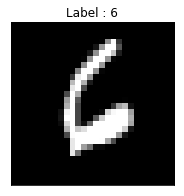

In [24]:
train_x, train_y = mnist.train.next_batch(10)
img = train_x[3,:].reshape(28,28)

plt.figure(figsize=(5,3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[3])))
plt.xticks([])
plt.yticks([])
plt.show()

One hot encoding

In [25]:
print ('Train labels : {}'.format(train_y[3, :]))

Train labels : [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


## 6.3. Build a Model

__ First, the layer performs several matrix multiplication to produce a set of linear activations __

<img src="./image_files/linear_sum2.png" width = 320>

$$y_j = \left(\sum\limits_i \omega_{ij}x_i\right) + b_j$$

$$\mathcal{y} = \omega^T \mathcal{x} + \mathcal{b}$$

```python
# hidden1 = tf.matmul(x, weights['hidden1']) + biases['hidden1']
hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
```

__ Second, each linear activation is running through a nonlinear activation function __

<img src="./image_files/ReLU.png" width = 500>

```python
hidden1 = tf.nn.relu(hidden1)
```

__Third, predict values with an affine transformation__

<img src="./image_files/classification.png" width = 450>

```python
# output = tf.matmul(hidden1, weights['output']) + biases['output']
output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
```

## 6.4. Define the ANN's Shape

- Input size
- Hidden layer size
- The number of classes

<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [26]:
n_input = 28*28
n_hidden1 = 100
n_output = 10

## 6.5. Define Weights, Biases and Network
- Define parameters based on predefined layer size
- Initialize with normal distribution with $\mu = 0$ and $\sigma = 0.1$

In [27]:
weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1)),
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1)),
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [28]:
# Define Network
def build_model(x, weights, biases):
    # first hidden layer
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    # non linear activate function
    hidden1 = tf.nn.relu(hidden1)
    
    # Output layer with linear activation
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

## 6.6. Define Cost, Initializer and Optimizer

__Loss__
- Classification: Cross entropy
    - Equivalent to apply logistic regression
$$ -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right)) $$

__Initializer__
- Initialize all the empty variables
    
__Optimizer__
- AdamOptimizer: the most popular optimizer

In [29]:
# Define Cost
LR = 0.0001

pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

## 6.7. Summary of Model

<br>
<img src="./image_files/cnn_summary of model.png" width = 500>
<br>

## 6.8. Define Configuration
- Define parameters for training ANN
     - `n_batch`: batch size for stochastic gradient descent
     - `n_iter`: the number of learning steps
     - `n_prt`: check loss for every `n_prt` iteration

In [30]:
n_batch = 50     # Batch Size
n_iter = 2500    # Learning Iteration
n_prt = 250      # Print Cycle

## 6.9. Optimization

In [31]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    sess.run(optm, feed_dict={x: train_x,  y: train_y}) 
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x : train_x,  y : train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.4568586349487305
Iter : 250
Cost : 1.4568665027618408
Iter : 500
Cost : 0.7992963194847107
Iter : 750
Cost : 0.6279309988021851
Iter : 1000
Cost : 0.4135037958621979
Iter : 1250
Cost : 0.4587893784046173
Iter : 1500
Cost : 0.3380467891693115
Iter : 1750
Cost : 0.4487552344799042
Iter : 2000
Cost : 0.39212024211883545
Iter : 2250
Cost : 0.3634752631187439


## 6.10. Test

In [32]:
test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict={x : test_x})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 92.0%


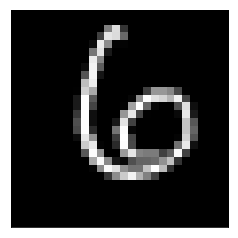

Prediction : 6
Probability : [ 0.    0.01  0.04  0.    0.01  0.    0.93  0.    0.01  0.  ]


In [33]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>